In [32]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sentiment140:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2477%2F4140%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240930%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240930T132912Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8003be8897908cc1bbac12e741d5ee640f3bc0b63754a0587bb64a0cab6da00fbb00dbf2afb710f04b181d7f21ee8e96ca0efeffb079e72c585f5d268f3ad0cc33509d4464b0782e49059b3e91fdf38bd65ddf889ccbfb5ebf3d29d2abe2a24b38b9de1a7a1740ed9347276aa5b7a084b9874d94ba9225e58f19cfc445535e360b76b7ae5edd6ee89582e0d3ed85bc35d44cebf4dac3cea3828efd72e9f552c96589cb89a5d83924478b8374f86f740ce4ab084d0de620101a4e2ed16277c5075284fe704ef1370da5217eed5849ad5338ebdf4c3cc97bbb9604b7e5c6e3fbb102514ede679fe20a3199a0684ad08290389bb70ebcb550f37debc60d96a70452'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 84855679 bytes downloaded
Downloaded and uncompressed: sentiment140
Data source import complete.


In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


#  **Tweets Sentiment Analysis Data** #
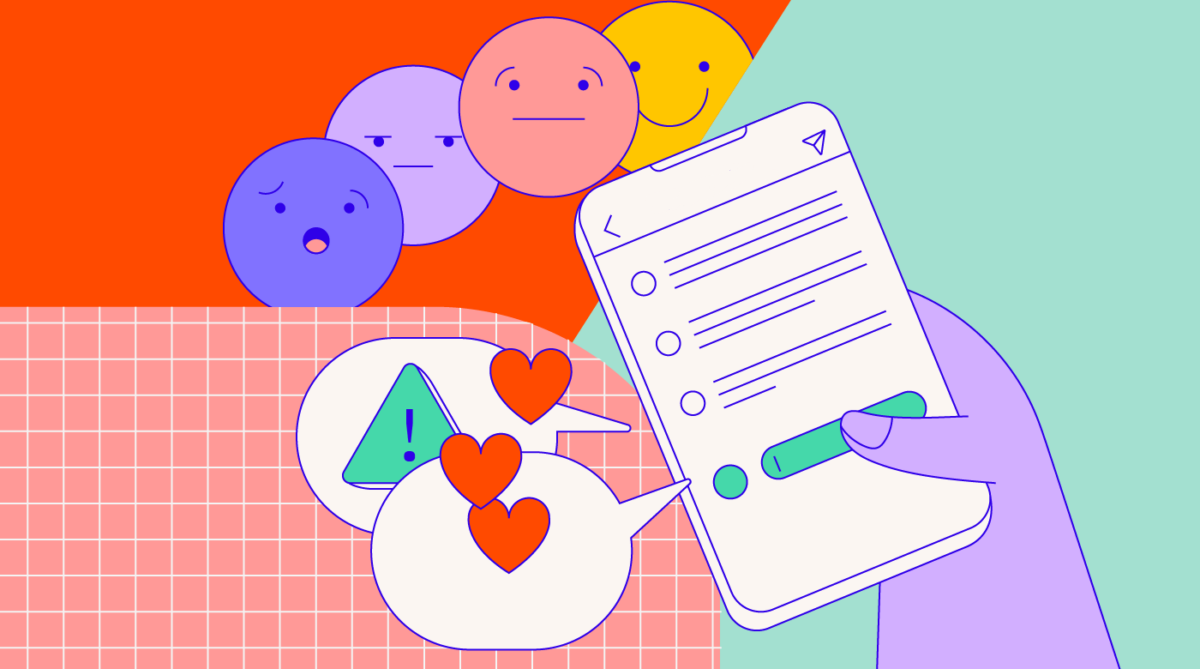
The dataset used in this project is designed for sentiment analysis on Twitter. Each tweet in the dataset is annotated with sentiment labels, specifically 0 for negative sentiment and 4 for positive sentiment.

# Import Libraries and Read Data

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Visualization
import warnings
warnings.simplefilter (action = 'ignore') # To prevent warnings from appearing in the console output of the program

In [35]:
# To find out the size of the dataset file

file_size_mb = os.path.getsize('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv') / (1024 * 1024)  # MB type
print(f"Data size: {file_size_mb:.2f} MB")

Data size: 227.74 MB


In [36]:
# The dataset is read from a CSV file.
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')


# Randomly sampling 10,000 rows from the dataset and data is saved into the df_sampled.

df_sampled = df.sample(n=10000, random_state=1)


* Due to the large size of the dataset and the specific ordering of negative and positive sentiment features, a random sample of the data was extracted using the **df.sample** filter.

* **ISO-8859-1** encoding was used to ensure proper handling of special characters in the file.


# **EDA - Exploratory Data Analysis**
Exploratory Data Analysis involves analyzing the basic characteristics of the dataset, such as missing values, data types, and general structure.
It also includes visualization and graphical representation to better understand the data.

In [37]:
df_sampled.head() # calls the first 5 rows of the df_sampled

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
120640,0,1833282794,Sun May 17 22:48:54 PDT 2009,NO_QUERY,kiranerdcore,i have to write a speech on &quot;speeches&quo...
189703,0,1969194686,Fri May 29 23:17:33 PDT 2009,NO_QUERY,rock_sister,"Yeah, this is just great, sick in the middle o..."
1595284,4,2192335895,Tue Jun 16 06:52:57 PDT 2009,NO_QUERY,murz13,"anyway, gotta go.. CSI: NY up next and I have ..."
1021096,4,1882504707,Fri May 22 06:59:42 PDT 2009,NO_QUERY,bredo,@skimhannahkeys @AliciaSkimbit i like your app...
98291,0,1793245629,Thu May 14 01:56:46 PDT 2009,NO_QUERY,IncredibleLAGO,@Lolene ummmmm.... U disappeared... So much fo...


In [38]:
df_sampled.info() # accesses the basic information of the df_sampled

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 120640 to 843490
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                               --------------  ----- 
 0   0                                                                                                                    10000 non-null  int64 
 1   1467810369                                                                                                           10000 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         10000 non-null  object
 3   NO_QUERY                                                                                                             10000 non-null  object
 4   _TheSpecialOne_ 

* Dataset is **non-null** and provides information about **data types**.

In [39]:
df_sampled.isna().sum()  # calculates the total number of missing (NaN) values for each column in the df_sampled

,0
0,0
1467810369,0
Mon Apr 06 22:19:45 PDT 2009,0
NO_QUERY,0
_TheSpecialOne_,0
"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0


* **isna()** method identifies missing values in the DataFrame and returns True for NaN values, and False otherwise.
* **.sum()** method then counts the number of True values for each column, effectively adding up the missing values.
* **info()** method verified that there were no null (NaN) values.


In [40]:
df_sampled.duplicated().sum() # checks for duplicate rows in the `df_sampled` DataFrame and counts the number of such duplicates

0

* **df_sampled.duplicated()** returns a boolean Series indicating whether each row is a duplicate.
* **.sum()** calculates the total number of duplicates by summing the True values in the Series.

In [41]:
df_sampled.columns = ['sentiment', 'ids', 'date', 'flag', 'user', 'tweets']  # update column names more readable

print(df_sampled.head())

         sentiment         ids                          date      flag  \
120640           0  1833282794  Sun May 17 22:48:54 PDT 2009  NO_QUERY   
189703           0  1969194686  Fri May 29 23:17:33 PDT 2009  NO_QUERY   
1595284          4  2192335895  Tue Jun 16 06:52:57 PDT 2009  NO_QUERY   
1021096          4  1882504707  Fri May 22 06:59:42 PDT 2009  NO_QUERY   
98291            0  1793245629  Thu May 14 01:56:46 PDT 2009  NO_QUERY   

                   user                                             tweets  
120640     kiranerdcore  i have to write a speech on &quot;speeches&quo...  
189703      rock_sister  Yeah, this is just great, sick in the middle o...  
1595284          murz13  anyway, gotta go.. CSI: NY up next and I have ...  
1021096           bredo  @skimhannahkeys @AliciaSkimbit i like your app...  
98291    IncredibleLAGO  @Lolene ummmmm.... U disappeared... So much fo...  


In [42]:
df_filtered = df_sampled[['sentiment', 'tweets']]

* Creates a new DataFrame **df_filtered** by selecting only the **'sentiment'** and **'tweets'** columns from the df_sampled DataFrame
* This operation filters the DataFrame to include only the relevant columns for further analysis

In [43]:
print(df_filtered.head())

         sentiment                                             tweets
120640           0  i have to write a speech on &quot;speeches&quo...
189703           0  Yeah, this is just great, sick in the middle o...
1595284          4  anyway, gotta go.. CSI: NY up next and I have ...
1021096          4  @skimhannahkeys @AliciaSkimbit i like your app...
98291            0  @Lolene ummmmm.... U disappeared... So much fo...


# **Data Preprocessing**
 Data Preprocessing involves steps such as cleaning the dataset, normalizing data, and splitting the dataset into training and test sets.
This process ensures the data is prepared for effective analysis and modeling.

**Convert to Lower Case**

In [44]:
# Convert to lower case
df_filtered['tweets'] = [token.lower() for token in df_filtered['tweets']]
df_filtered.head(5)

,sentiment,tweets
120640,0,i have to write a speech on &quot;speeches&quo...
189703,0,"yeah, this is just great, sick in the middle o..."
1595284,4,"anyway, gotta go.. csi: ny up next and i have ..."
1021096,4,@skimhannahkeys @aliciaskimbit i like your app...
98291,0,@lolene ummmmm.... u disappeared... so much fo...


**Remove @ Mentions and Hyperlinks**

In [45]:
# Remove @ mentions
df_filtered['tweets'] = df_filtered['tweets'].replace('@[A-Za-z0-9]+', '', regex=True)

In [50]:
# Remove hyperlinks
df_filtered['tweets'] = df_filtered['tweets'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

# Verify removal
found = df_filtered[df_filtered['tweets'].str.contains('http')]
found.count()

,0
sentiment,0
tweets,0


**Remove Punctuations and Numbers**

In [52]:
import string
import re
# Remove numbers
texts = df_filtered['tweets'].copy()
new_text = [re.sub('[0-9]+', '', text) for text in texts]
df_filtered['tweets'] = new_text

In [53]:
# Remove punctuations
table = str.maketrans('', '', string.punctuation)
texts = df_filtered['tweets'].copy()
new_text = [' '.join([w.translate(table) for w in text.split()]) for text in texts]
df_filtered['tweets'] = new_text
df_filtered['tweets'].head(5)

,tweets
120640,i have to write a speech on quotspeechesquot w...
189703,yeah this is just great sick in the middle of ...
1595284,anyway gotta go csi ny up next and i have asia...
1021096,i like your approach to get the twitter power ...
98291,ummmmm u disappeared so much for nite out


In [54]:
# import libraries for performing text search and manipulation tasks, such as pattern matching, text extraction, and text substitution

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

**NLTK (Natural Language Toolkit)** library for text processing.
* **nltk.download('stopwords')**: Downloads the NLTK list of stopwords. This list contains common words like 'the', 'is', and 'and' that are usually irrelevant for text analysis.
* **nltk.download('punkt')**: Downloads the 'punkt' model necessary for text tokenization. This model is used for splitting text into sentences and words.
* **nltk.download('wordnet')**: Downloads the WordNet lexical database. This database contains semantic relationships between words and is used for lemmatization (reducing words to their base or root form).


In [55]:
# necessary NLTK data

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

**TOKENIZATION**

In [56]:
# word tokenization of tweets
df_filtered['words'] = df_filtered['tweets'].apply(word_tokenize)


print(df_filtered[['tweets', 'words']].head())

                                                    tweets  \
120640   i have to write a speech on quotspeechesquot w...   
189703   yeah this is just great sick in the middle of ...   
1595284  anyway gotta go csi ny up next and i have asia...   
1021096  i like your approach to get the twitter power ...   
98291            ummmmm u disappeared so much for nite out   

                                                     words  
120640   [i, have, to, write, a, speech, on, quotspeech...  
189703   [yeah, this, is, just, great, sick, in, the, m...  
1595284  [anyway, got, ta, go, csi, ny, up, next, and, ...  
1021096  [i, like, your, approach, to, get, the, twitte...  
98291    [ummmmm, u, disappeared, so, much, for, nite, ...  


**Stopwords ve Lemmatizer**

In [57]:
# stopwords list
stop_words = set(stopwords.words('english'))

# cleaning
df_filtered['words_cleaned'] = df_filtered['words'].apply(lambda words: [word for word in words if word.lower() not in stop_words])


print(df_filtered[['tweets', 'words', 'words_cleaned']].head())

                                                    tweets  \
120640   i have to write a speech on quotspeechesquot w...   
189703   yeah this is just great sick in the middle of ...   
1595284  anyway gotta go csi ny up next and i have asia...   
1021096  i like your approach to get the twitter power ...   
98291            ummmmm u disappeared so much for nite out   

                                                     words  \
120640   [i, have, to, write, a, speech, on, quotspeech...   
189703   [yeah, this, is, just, great, sick, in, the, m...   
1595284  [anyway, got, ta, go, csi, ny, up, next, and, ...   
1021096  [i, like, your, approach, to, get, the, twitte...   
98291    [ummmmm, u, disappeared, so, much, for, nite, ...   

                                             words_cleaned  
120640   [write, speech, quotspeechesquot, wtf, thanks,...  
189703   [yeah, great, sick, middle, night, cant, sleep...  
1595284  [anyway, got, ta, go, csi, ny, next, asia, mem...  
1021096  [

In [58]:
from nltk.stem import WordNetLemmatizer

# Lemmatizer object
lemmatizer = WordNetLemmatizer()

# function according to the type of words such as noun, verb etc.
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Lemmatization
df_filtered['words_lemmatized'] = df_filtered['words_cleaned'].apply(lambda words: [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words])


print(df_filtered[['words_cleaned', 'words_lemmatized']].head(10))


                                             words_cleaned  \
120640   [write, speech, quotspeechesquot, wtf, thanks,...   
189703   [yeah, great, sick, middle, night, cant, sleep...   
1595284  [anyway, got, ta, go, csi, ny, next, asia, mem...   
1021096  [like, approach, get, twitter, power, promote,...   
98291                 [ummmmm, u, disappeared, much, nite]   
755196   [swear, dont, go, coldstone, soon, start, crying]   
925330   [church, mommys, soccer, game, amp, family, di...   
1517423  [iremember, ehh, last, month, im, little, mont...   
1462903  [thinks, time, twitter, worked, haha, got, exa...   
716696                 [shit, think, tweeted, twice, srry]   

                                          words_lemmatized  
120640   [write, speech, quotspeechesquot, wtf, thanks,...  
189703   [yeah, great, sick, middle, night, cant, sleep...  
1595284  [anyway, get, ta, go, csi, ny, next, asia, mem...  
1021096  [like, approach, get, twitter, power, promote,...  
98291       

There are changes like:

*  worked -> work
*  got -> get
* thinks -> think





**REMOVE EXTRA SPACE**

In [59]:
# removes extra space
df_filtered['processed_tweets'] = df_filtered['words_lemmatized'].apply(lambda words: ' '.join(words).strip())


print(df_filtered[['processed_tweets']].head())

                                          processed_tweets
120640        write speech quotspeechesquot wtf thanks raz
189703   yeah great sick middle night cant sleepand gon...
1595284  anyway get ta go csi ny next asia memorize tyl...
1021096  like approach get twitter power promote goodly...
98291                         ummmmm u disappear much nite


**REMOVE RARE WORDS**

In [60]:
from collections import Counter

# all words one list
all_words = ' '.join(df_filtered['processed_tweets']).split()
word_freq = pd.Series(all_words).value_counts()

# words that frequent only once
less_frequent = word_freq[word_freq == 1].index

# cleaning
df_filtered['processed_tweets'] = df_filtered['processed_tweets'].apply(lambda x: ' '.join(word for word in x.split() if word not in less_frequent))


print(df_filtered[['tweets', 'processed_tweets']].head())


                                                    tweets  \
120640   i have to write a speech on quotspeechesquot w...   
189703   yeah this is just great sick in the middle of ...   
1595284  anyway gotta go csi ny up next and i have asia...   
1021096  i like your approach to get the twitter power ...   
98291            ummmmm u disappeared so much for nite out   

                                          processed_tweets  
120640                             write speech wtf thanks  
189703   yeah great sick middle night cant sleepand gon...  
1595284       anyway get ta go ny next asia see yall byeee  
1021096         like approach get twitter power promote em  
98291                         ummmmm u disappear much nite  


**REMOVE DUBLICATED ROWS**

In [61]:
# dublicated rows
duplicated_rows = df_filtered[df_filtered['processed_tweets'].duplicated()]

print(f"Dublicated rows: {duplicated_rows.shape[0]}")

Dublicated rows: 326


In [62]:
# drop dublicated rows
df_filtered_unique = df_filtered.drop_duplicates(subset='processed_tweets')


print(f"Orijinal dataset size: {df_filtered.shape[0]}")
print(f"After remove dublicated rows dataset size: {df_filtered_unique.shape[0]}")

Orijinal dataset size: 10000
After remove dublicated rows dataset size: 9932


In [63]:
# updated DataFrame
df_filtered = df_filtered_unique

**Target variable adjustment**

In [64]:
# change sentiment values positive 4 to 1
df_filtered['sentiment'] = df_filtered['sentiment'].replace(4, 1)

print(df_filtered['sentiment'].head())

120640     0
189703     0
1595284    1
1021096    1
98291      0
Name: sentiment, dtype: int64


**Converting Texts to Numerical Vectors**

The **TF-IDF (Term Frequency-Inverse Document Frequency)** transformation converts text data into a numerical format, allowing models to better understand text and make more effective predictions for processing.

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vekctorizer object
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df_filtered['processed_tweets'])

In [66]:
# data type
print(df_filtered['processed_tweets'].apply(type).value_counts())

processed_tweets
<class 'str'>    9932
Name: count, dtype: int64


# DATA VISUALIZATION

**Sentiment Distribution Analysis**




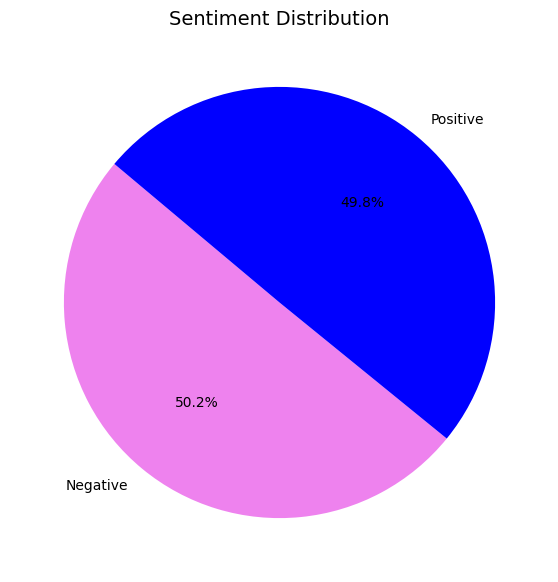

In [67]:
# sentiment distribution
sentiment_counts = df_filtered['sentiment'].value_counts()

# tags
labels = {
    0: 'Negative',
    1: 'Positive'
}

# tags list
custom_labels = [labels.get(x, str(x)) for x in sentiment_counts.index]

# colors
colors = ('violet', 'blue')

# pie chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=custom_labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution", size=14)
plt.show()

The pie chart illustrates the distribution of sentiments in the dataset. The distribution is as follows:

* Positive Sentiments: 49.8%
* Negative Sentiments: 50.2%

This near-even split between positive and negative sentiments indicates a balanced representation of opinions within the dataset.

**Most Frequent Positive and Negative Words Cloud**

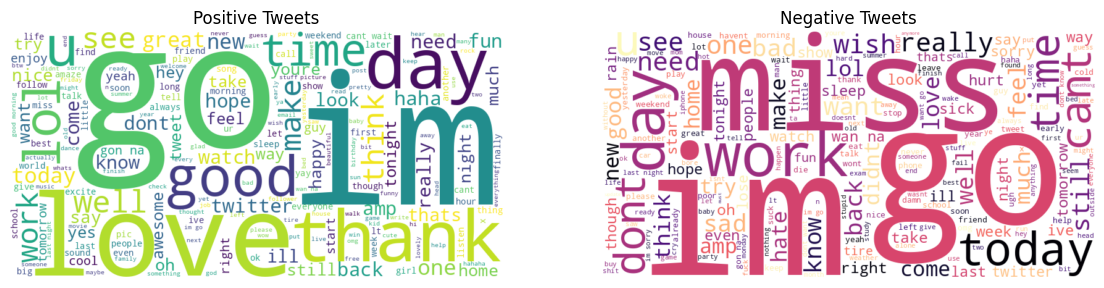

In [69]:
from wordcloud import WordCloud

def plot_wordclouds(positive_text, negative_text):
    # graph size and subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    # positive tweets
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_text)
    axes[0].imshow(wordcloud_positive, interpolation='bilinear')
    axes[0].set_title('Positive Tweets')
    axes[0].axis('off')

    # negative tweets
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(negative_text)
    axes[1].imshow(wordcloud_negative, interpolation='bilinear')
    axes[1].set_title('Negative Tweets')
    axes[1].axis('off')

    # subplots
    plt.subplots_adjust(wspace=0.2)  # space between subplots
    plt.show()

# Positive and negative tweets
positive_text = ' '.join(df_filtered[df_filtered['sentiment'] == 1]['processed_tweets'].astype(str))
negative_text = ' '.join(df_filtered[df_filtered['sentiment'] == 0]['processed_tweets'].astype(str))

plot_wordclouds(positive_text, negative_text)

In word clouds, words are visualized according to their frequencies.
* Positive tweets includes: im, good, love, thank, lol, go
* Negative tweets includes: im, miss, work, go, today, cant

**Relationship Between Sentiment and Tweet Length**

In [70]:
# group lengths by emotion labels

df_filtered['text_length'] = df_filtered['processed_tweets'].apply(len)

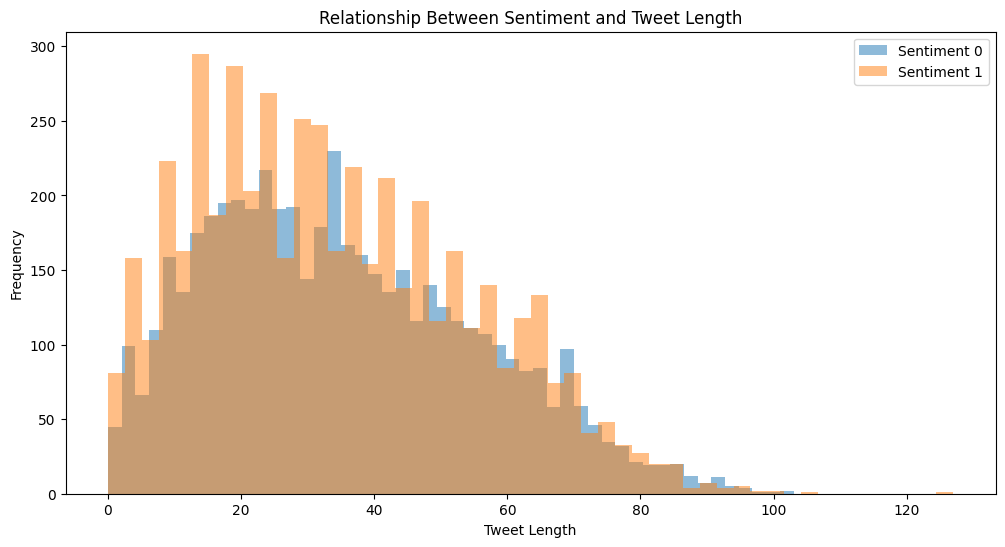

In [71]:
plt.figure(figsize=(12, 6))
for sentiment in df_filtered['sentiment'].unique():
    subset = df_filtered[df_filtered['sentiment'] == sentiment]
    plt.hist(subset['text_length'], bins=50, alpha=0.5, label=f'Sentiment {sentiment}')

plt.title('Relationship Between Sentiment and Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

According to the graph, increasing tweet length affects positive and negative tweet length. While tweet length is between 0 - 80, positive tweet frequency is between 0 - 200. Short tweets, which are noticed from the brown part, contain more positivity.

**Sentiment Distribution of Users**

In [72]:
# for sentiment distribution per user
# df_sampled was used to access usernames

top_users = df_sampled['user'].value_counts().head(10).index
top_users_df = df_sampled[df_sampled['user'].isin(top_users)]

In [73]:
# sentiment data
user_sentiment = top_users_df.groupby('user')['sentiment'].value_counts().unstack()

The **user_sentiment** DataFrame contains the frequencies of sentiment analysis results for each user, with each sentiment analysis result as a column. It is useful for better understanding and comparing sentiment analysis results of users.

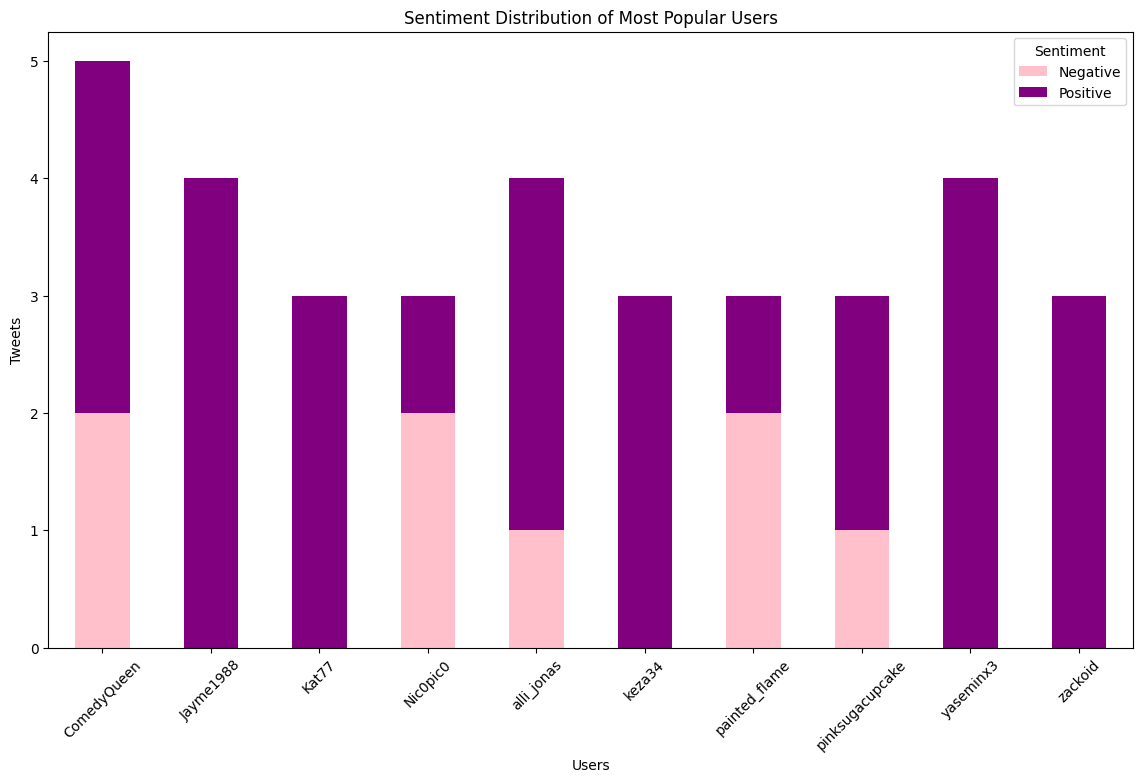

In [74]:
# visualization
user_sentiment.plot(kind='bar', stacked=True, figsize=(14, 8), color = ['pink', 'purple'])
plt.title('Sentiment Distribution of Most Popular Users')
plt.xlabel('Users')
plt.ylabel('Tweets')
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.xticks(rotation=45)
plt.show()

According to the graph, the tweets of the top 10 users generally contain positive sentiment.

# OUTLIER

Outliers are data points that differ significantly from the overall distribution of the data set. These values ​​usually show deviations from the "normal" distribution in the data set.

In [75]:
from scipy import stats


# Z-Score
z_scores = stats.zscore(df_filtered['text_length'])

# outliers
outliers = df_filtered[abs(z_scores) > 3]
print(outliers)


         sentiment                                             tweets  \
525606           0  better mood this morning except that class sta...   
853607           1  nice gentleman nxt door was kind enough to tel...   
1539424          1  in our family bed i said quotlets try to fall ...   
768944           0  watching big bro its nearly over tbh though im...   
902885           1  just leaving rainy forks starting the long jou...   
92742            0  is back home amp feels badly that a nice day w...   
1153322          1  im trying harder coz ily more hbdandyhurley hb...   
646125           0  friday june  camps are rained out saturday jun...   
1387257          1  many external influences r spiralling outta my...   
1294568          1  mcflyforgermany mcflyforgermany mcflyforgerman...   
911936           1  night dance parties fun times amp awkward situ...   
59246            0  idea for lossy text compression convert to ano...   
756496           0  soo bummed about jon amp kate i

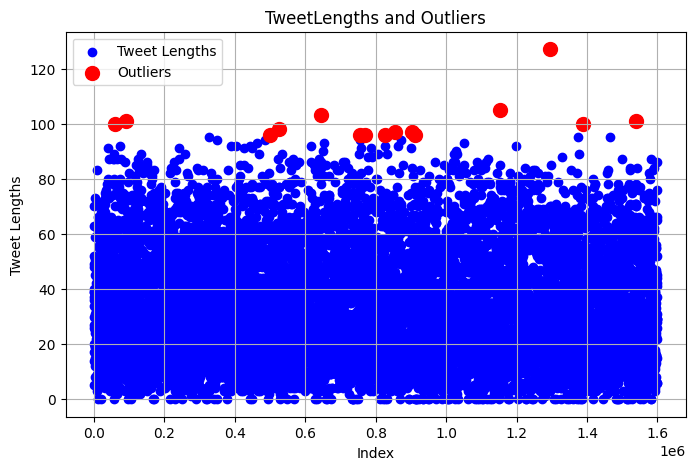

In [77]:
# Distribution graph
plt.figure(figsize=(8, 5))
plt.scatter(df_filtered.index, df_filtered['text_length'], color='blue', label='Tweet Lengths')
plt.scatter(outliers.index, outliers['text_length'], color='red', label='Outliers', marker='o', s=100)
plt.title('TweetLengths and Outliers')
plt.xlabel('Index')
plt.ylabel('Tweet Lengths')
plt.legend()
plt.grid(True)
plt.show()


* Most are between 0 and 100 characters, and only a few tweets are over 100 characters. In this case, tweets over 100 characters are considered outliers, but very few are. This indicates that most tweets are within the standard length range.
* It indicates that the data is mostly concentrated around the mean, and outliers are rare. If tweet lengths are mostly concentrated in a certain range, with few data points falling outside this range, the data distribution may be homogeneous.

# Algorithm Selection & Hyperparameter Optimization

**Training and Test Data Separation**

As a result of the **TfidfVectorizer** process above, a set of numerical features are obtained for each tweet. These **features are the independent variables** that the model needs to learn. Therefore, we call the matrix of vectors resulting from this transformation X. In other words, X contains the TF-IDF feature vectors of each text.
```
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_filtered['processed_tweets'])
```



In [78]:
from sklearn.model_selection import train_test_split

# sentiment tags target variables
y = df_filtered['sentiment']

# Separate the training and test sets (training 80%, test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set size:", X_train.shape)
print("Test set size", X_test.shape)


Train set size: (7945, 4465)
Test set size (1987, 4465)


# SUPERVISED LEARNING

In [79]:
#import libraries

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [80]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "XGBClassifier": XGBClassifier()
}

**MODEL TRAINING AND MEASURING SUCCESS METRICS WITH CROSS VALIDATION**

In [81]:
for name, classifier in classifiers.items():
    # train model
    classifier.fit(X_train, y_train)

    # predictions test set
    y_test_pred = classifier.predict(X_test)

    # performance metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    # cross validation
    scores = cross_validate(classifier, X_train, y_train,
                            scoring=['accuracy', 'precision', 'recall', 'f1'],
                            cv=10, return_train_score=False)

    # result to DataFrame
    scores_df = pd.DataFrame(scores)

    print(f"Model: {name.upper()}")
    print(f"Accuracy Score: {accuracy:.5f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("Cross-Validation Scores:")
    print(scores_df.mean().apply("{:.5f}".format))  # avg
    print("\n############################################################################\n")


Model: LOGISTIC REGRESSION
Accuracy Score: 0.71616
Confusion Matrix:
[[679 321]
 [243 744]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1000
           1       0.70      0.75      0.73       987

    accuracy                           0.72      1987
   macro avg       0.72      0.72      0.72      1987
weighted avg       0.72      0.72      0.72      1987

Cross-Validation Scores:
fit_time          0.08359
score_time        0.02165
test_accuracy     0.72889
test_precision    0.71796
test_recall       0.75018
test_f1           0.73357
dtype: object

############################################################################

Model: RANDOM FOREST CLASSIFIER
Accuracy Score: 0.71414
Confusion Matrix:
[[673 327]
 [241 746]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1000
           1       0.70      0.76      0.72       987



# MODEL SELECTION

**Logistic Regression (LR)**
* Accuracy: 71.61%
* Risk of Overfitting: Lower.
* Training Time: Faster.
* Interpretability: Higher.
* Precision and Recall:
     * 74% precision, 68% recall for class 0;
     * 70% precision, 75% recall for class 1.


**Support Vector Classifier (SVC)**
* Accuracy: 71.96%
* Risk of Overfitting: May be higher.
* Training Time: Longer.
* Interpretability: Lower.
* Precision and Recall:
    * 74% precision, 68% recall for class 0;
    * 70% precision, 76% recall for class 1.


**Logistic Regression** model due to its **interpretability, speed, and lower risk of overfitting**. This model offers more advantages and can provide more understandable results. It is a balanced choice in terms of both performance and practicality.

# HYPERPARAMETER OPTIMIZATION


**Randomized Search** has been chosen due to its **efficiency, wide coverage, global optimization capability, minimal assumptions, and speed**. This method offers the potential for more effective results in hyperparameter optimization.

In [82]:
#import library
from sklearn.model_selection import RandomizedSearchCV

In [83]:
# hypermeter intervals
param_distributions = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# model
model = LogisticRegression()

# RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# training model
random_search.fit(X, y)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'solver': 'saga', 'max_iter': 100, 'C': 0.615848211066026}
Best Score: 0.7317766387865537


The results show that the model achieves **73.18% accuracy** with optimized hyperparameters.

The **saga solver** and the determined **C value** have the potential to improve the performance of the model.

**TRAINING THE MODEL**

Accuracy: 0.7217
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71      1000
           1       0.70      0.76      0.73       987

    accuracy                           0.72      1987
   macro avg       0.72      0.72      0.72      1987
weighted avg       0.72      0.72      0.72      1987



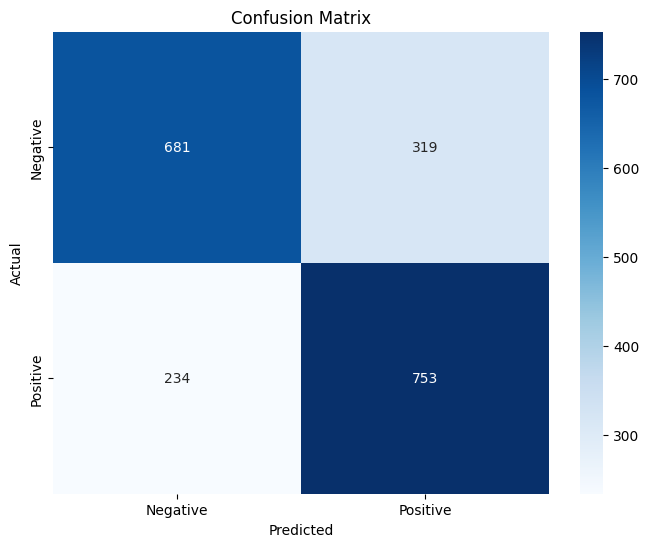

In [84]:
# Best parameters with Logistic Regression Model
model = LogisticRegression(solver='saga', max_iter=100, C=0.615848211066026)

# training model
model.fit(X_train, y_train)

# prediction test set
y_pred = model.predict(X_test)

# performance metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

# visualization confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* **True Positives (TP)**: 753 (Correctly predicted positive instances)
* **True Negatives (TN)**: 681 (Correctly predicted negative instances)
* **False Positives (FP)**: 319 (Incorrectly predicted negative instances as positive)
* **False Negatives (FN)**: 234 (Incorrectly predicted positive instances as negative)

**Precision**:

* For class 0: 0.74
* For class 1: 0.70

High precision indicates the proportion of true positive predictions out of total positive predictions.

**Recall**:

* For class 0: 0.68
* For class 1: 0.76

High recall indicates how well the model captures actual positive instances.

**F1-Score:**

* For class 0: 0.71
* For class 1: 0.73

The F1 score is the harmonic mean of precision and recall, providing a better measure in imbalanced datasets.

**Accuracy**: 0.72 (approximately 72%)

This represents the overall proportion of correctly predicted instances out of the total instances.
The higher recall for class 1 indicates that the model identifies this class better, while the lower recall for class 0 suggests that some instances of this class are being misclassified as positive.

# UNSUPERVISED LEARNING

In [85]:
# clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [86]:
# to scale the data
from sklearn.preprocessing import StandardScaler

# to identify outliers
from sklearn.metrics import silhouette_score

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

# calculate frequency words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_filtered['processed_tweets']).toarray()  # transformation


In [92]:
# calculate sentiment score for each tweet in column 'processed_tweets' using TextBlob
# 'polarity' value ranges from -1 (negative) to 1 (positive)
df_filtered['sentiment_score'] = df_filtered['processed_tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [89]:
# convert sentiment score into two-dimensional array (-1 and 1)
sentiment_scores = df_filtered['sentiment_score'].values.reshape(-1, 1)

# combine tfidf results and sentiment score
X_combined = np.hstack((X, sentiment_scores))

In [90]:
from sklearn.cluster import KMeans, DBSCAN

# k-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_combined)
df_filtered['kmeans_labels'] = kmeans.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_combined)
df_filtered['dbscan_labels'] = dbscan.labels_

In [91]:
from sklearn.metrics import silhouette_score

# calculate silhouette score
kmeans_silhouette = silhouette_score(X_combined, df_filtered['kmeans_labels'])
dbscan_silhouette = silhouette_score(X_combined, df_filtered['dbscan_labels'])


print("K-Means Silhouette Score:", kmeans_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

K-Means Silhouette Score: 0.061263947908568595
DBSCAN Silhouette Score: -0.26958401430229917


**K-Means** result, **Silhouette score is 0.061**, this value is positive but quite low. This shows that the clusters are somewhat close to each other.

**Elbow Method**

The Elbow Method observes that the sum of squared errors of the model decreases as the number of clusters increases.


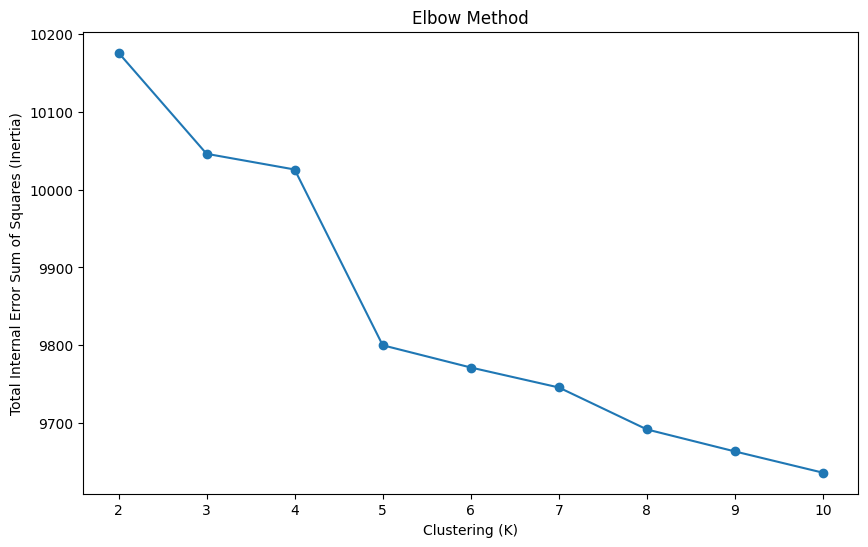

In [93]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# KMeans
kmeans = KMeans(random_state=42)

# range for number of clusters
k_range = range(2, 11)
inertia = []

# for different number of clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_combined)  # X_combined, TF-IDF matrix
    inertia.append(kmeans.inertia_)

# Elbow Method Graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clustering (K)')
plt.ylabel('Total Internal Error Sum of Squares (Inertia)')
plt.show()

**Selecting the Number of Clusters with Silhouette Score**



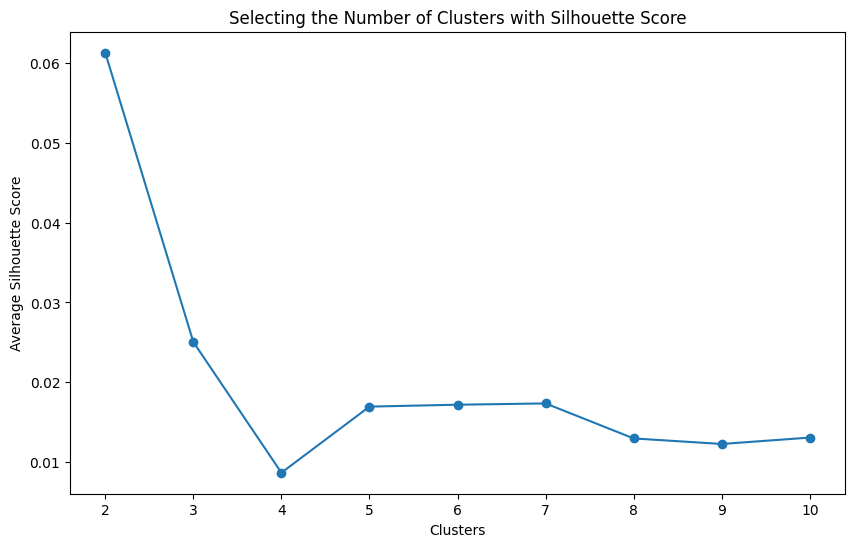

In [94]:
from sklearn.metrics import silhouette_score

# Silhouette
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_combined)
    silhouette_avg = silhouette_score(X_combined, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Silhouette graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Selecting the Number of Clusters with Silhouette Score')
plt.xlabel('Clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

**k=2: Silhouette Score = 0.06**

In this case, the number of clusters with the highest **Silhouette Score k=2** is selected as the **most suitable number of clusters**.